Attribute Information:                                                                                                               

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)                                                                            

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter)   
2) texture (standard deviation of gray-scale values)                                                                           
3) perimeter      
4) area      
5) smoothness (local variation in radius lengths)                                                         
6) compactness (perimeter^2 / area - 1.0)                        
7) concavity (severity of concave portions of the contour)      
8) concave points (number of concave portions of the contour)      
9) symmetry                                  
10) fractal dimension ("coastline approximation" - 1)     

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('C:/Users/saidh/Desktop/End to End Multiple Disease Detection/data/cancer.csv')
del data['Unnamed: 32']

In [3]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [6]:
classifier = Sequential()

input_dim - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

The ReLU function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this. Source : StackExchange

In [9]:
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
classifier.add(Dropout(p=0.1))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.1))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\i

output_dim is 1 as we want only 1 output from the final layer.

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used.

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In [11]:
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
512/512 [==============================] - 2s 5ms/step - loss: 0.6929 - acc: 0.6250
Epoch 2/150
512/512 [==============================] - 0s 57us/step - loss: 0.6920 - acc: 0.6289
Epoch 3/150
512/512 [==============================] - 0s 68us/step - loss: 0.6911 - acc: 0.6289
Epoch 4/150
512/512 [==============================] - 0s 63us/step - loss: 0.6900 - acc: 0.6289
Epoch 5/150
512/512 [==============================] - 0s 76us/step - loss: 0.6890 - acc: 0.6289
Epoch 6/150
512/512 [==============================] - ETA: 0s - loss: 0.6857 - acc: 0.700 - 0s 91us/step - loss: 0.6881 - acc: 0.6289
Epoch 7/150
512/512 [==============================] - ETA: 0s - loss: 0.6866 - acc: 0.640 - 0s 69us/step - loss: 0.6868 - acc: 0.6289
Epoch 8/150
512/512 [==============================] - 0s 72us/step - loss: 0.6855 - acc: 0.6289
Epoch 9/150
512/512 [==============================] - 0s 70us/step - loss: 0.6836 - acc: 0.6289
Epoch 10/150
512/512 [==============================

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [13]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
y_test.shape

(57,)

In [15]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 100.0%


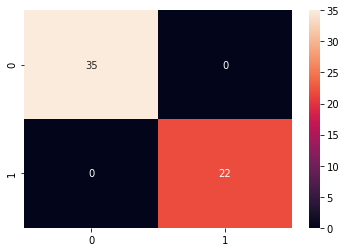

In [16]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')